# TIME SERIES ANALYSIS OF NETFLIX STOCKS DATA


---



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import itertools
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv(r"/content/drive/MyDrive/Google.csv", 
                      index_col = ['Date'], parse_dates = ['Date'])
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.9600,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.5000,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.0500,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.5700,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.8800,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-10,827.07,829.41,823.1400,826.010,1141799.0,0.0,1.0,827.070000,829.410000,823.140000,826.010000,1141799.0
2017-01-11,826.62,829.90,821.4700,829.860,1261666.0,0.0,1.0,826.620000,829.900000,821.470000,829.860000,1261666.0
2017-01-12,828.38,830.38,821.0100,829.530,1348274.0,0.0,1.0,828.380000,830.380000,821.010000,829.530000,1348274.0


In [8]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [9]:
data.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-03,800.62,811.435,796.8900,807.57,1948199.0,0.0,1.0,800.62,811.435,796.8900,807.57,1948199.0
2017-01-04,809.89,813.430,804.1100,807.77,1495919.0,0.0,1.0,809.89,813.430,804.1100,807.77,1495919.0
2017-01-05,807.50,813.740,805.9200,813.02,1318301.0,0.0,1.0,807.50,813.740,805.9200,813.02,1318301.0
2017-01-06,814.99,828.960,811.5000,825.21,1983025.0,0.0,1.0,814.99,828.960,811.5000,825.21,1983025.0
2017-01-09,826.37,830.430,821.6200,827.18,1405091.0,0.0,1.0,826.37,830.430,821.6200,827.18,1405091.0
2017-01-10,827.07,829.410,823.1400,826.01,1141799.0,0.0,1.0,827.07,829.410,823.1400,826.01,1141799.0
2017-01-11,826.62,829.900,821.4700,829.86,1261666.0,0.0,1.0,826.62,829.900,821.4700,829.86,1261666.0
2017-01-12,828.38,830.380,821.0100,829.53,1348274.0,0.0,1.0,828.38,830.380,821.0100,829.53,1348274.0
2017-01-13,831.00,834.650,829.5200,830.94,1255255.0,0.0,1.0,831.00,834.650,829.5200,830.94,1255255.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3125 entries, 2004-08-19 to 2017-01-17
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3125 non-null   float64
 1   High         3125 non-null   float64
 2   Low          3125 non-null   float64
 3   Close        3125 non-null   float64
 4   Volume       3125 non-null   float64
 5   Ex-Dividend  3125 non-null   float64
 6   Split Ratio  3125 non-null   float64
 7   Adj. Open    3125 non-null   float64
 8   Adj. High    3125 non-null   float64
 9   Adj. Low     3125 non-null   float64
 10  Adj. Close   3125 non-null   float64
 11  Adj. Volume  3125 non-null   float64
dtypes: float64(12)
memory usage: 317.4 KB


In [11]:
data.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3125.000000,3125.000000,3125.000000,3125.000000,3.125000e+03,3125.000000,3125.0,3125.000000,3125.000000,3125.000000,3125.000000,3.125000e+03
mean,560.171567,565.480031,554.309518,559.907342,8.404691e+06,0.181751,1.0,354.861790,358.112859,351.231911,354.691981,8.404691e+06
std,200.944961,201.563829,199.979903,200.813213,8.399679e+06,10.160186,0.0,195.252794,196.367956,193.820339,195.144724,8.399679e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,445.250000,450.720000,438.560500,444.080000,3.209500e+06,0.000000,1.0,223.314350,226.057819,219.959243,222.727539,3.209500e+06
50%,548.490000,553.520000,543.670000,548.650000,5.620700e+06,0.000000,1.0,288.992091,291.399522,286.760201,289.578902,5.620700e+06
75%,667.490000,673.027500,659.240000,667.120000,1.107890e+07,0.000000,1.0,517.492450,520.810000,513.108918,517.372078,1.107890e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,838.500000,839.000000,829.520000,835.740000,8.215110e+07


In [13]:
data.isnull().values.any()

False

In [12]:
data.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

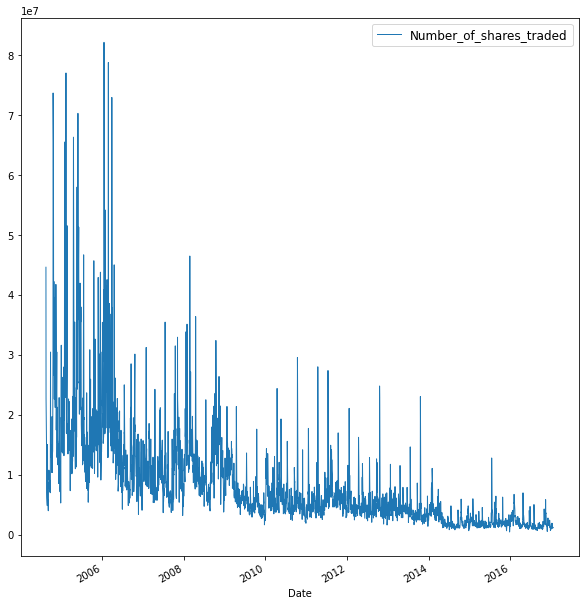

In [18]:
data['Volume'].plot(figsize = (10,11), linewidth = 1, label = 'Number_of_shares_traded');
plt.legend(fontsize = 12)

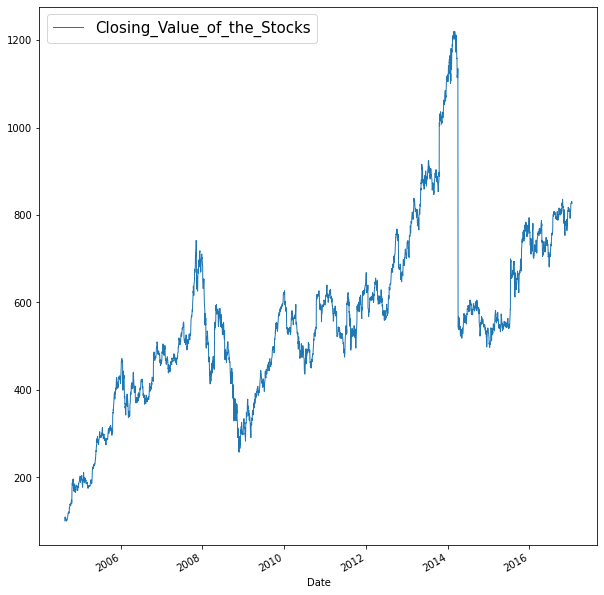

In [19]:
data['Close'].plot(figsize = (10,11), linewidth = 1, label = 'Closing_Value_of_the_Stocks');
plt.legend(fontsize = 15)

__Decomposition__

<Figure size 720x792 with 0 Axes>

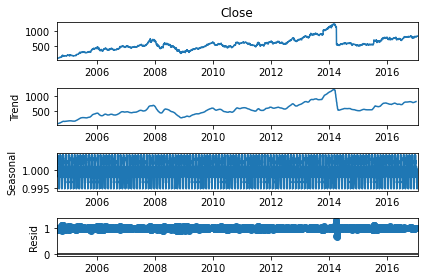

In [20]:
plt.figure(figsize = (10, 11))
decompose = seasonal_decompose(data['Close'], model = 'multiplicative', period = 25)
decompose.plot()
plt.show()

In [21]:
df = data['Close']

In [22]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

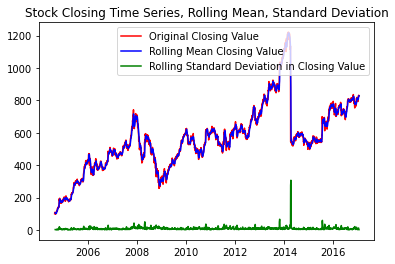

In [23]:
plt.plot(df, color = "red", label = "Original Closing Value")
plt.plot(rolling_mean, color = "blue", label = "Rolling Mean Closing Value")
plt.plot(rolling_std, color = "green", label = "Rolling Standard Deviation in Closing Value")
plt.title("Stock Closing Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc = "best")

In [24]:
from pandas import to_datetime
adft = adfuller(df, autolag = "AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3],adft[4]['1%'],adft[4]['5%'],adft[4]['10%']] , "Metric":["Test Statistics","p-value", "No. of lags used", "Number of observations used",
                                                       "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -2.431067              Test Statistics
1     0.133159                      p-value
2     1.000000             No. of lags used
3  3123.000000  Number of observations used
4    -3.432446          critical value (1%)
5    -2.862466          critical value (5%)
6    -2.567263         critical value (10%)


In [25]:
result = adfuller(data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.431067
p-value: 0.133159
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


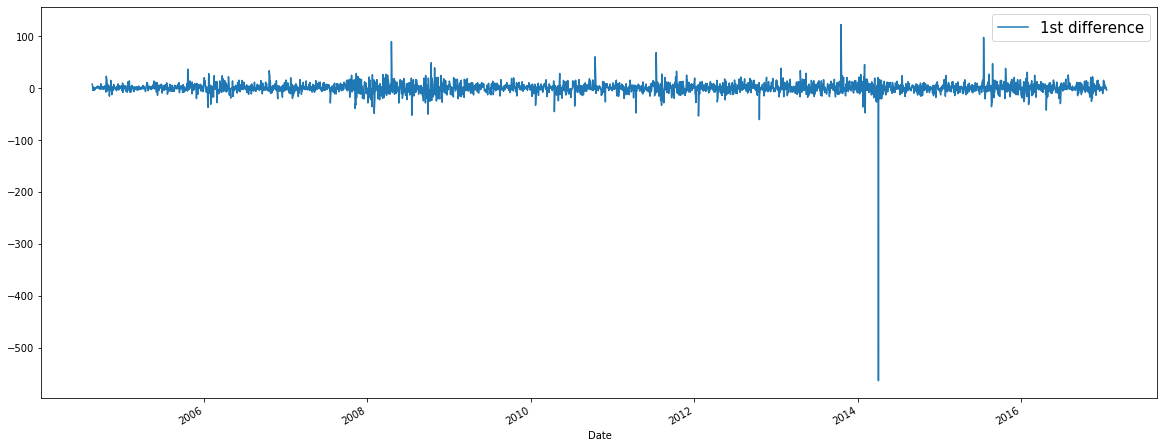

In [26]:
diff1 = pd.Series(data['Close'].diff()).dropna()
diff1.plot(figsize=(20,8), label = '1st difference')
plt.legend(fontsize = 15)


In [27]:
result = adfuller(diff1)
print('ADF Statistic: %f' % result[0])
print('p-Value: %e' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -54.415338
p-Value: 0.000000e+00
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


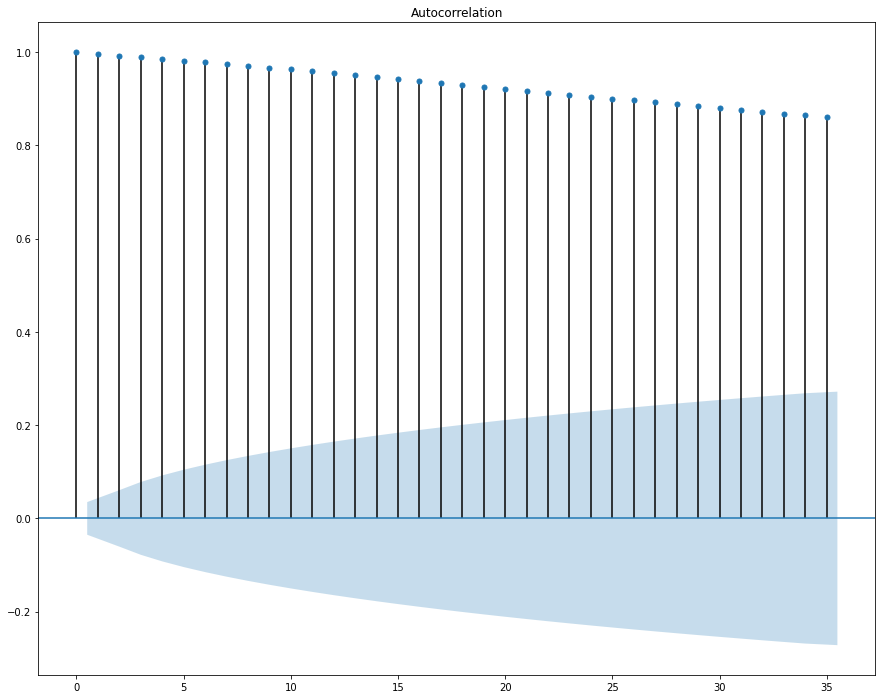

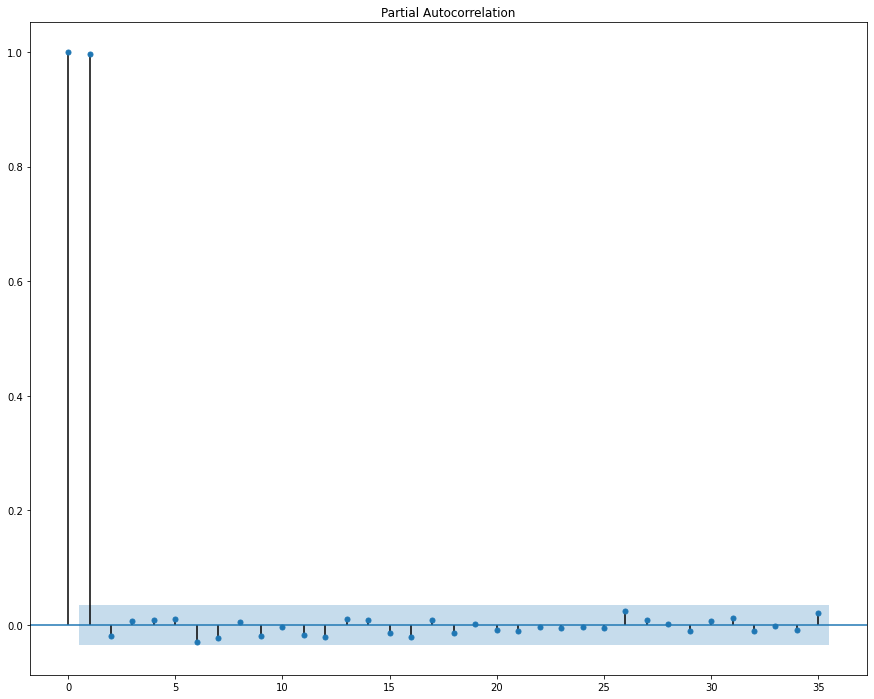

In [28]:
#ACF and PACF of the initial data
plt.rcParams["figure.figsize"] = (15,12)
plot_acf(data.Close);
plot_pacf(data.Close);


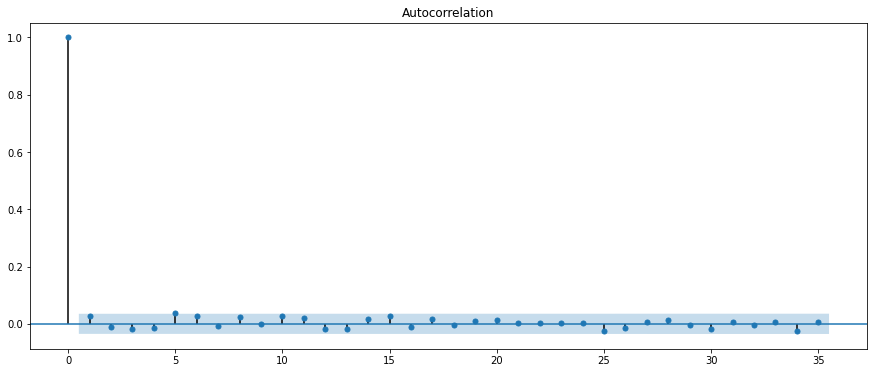

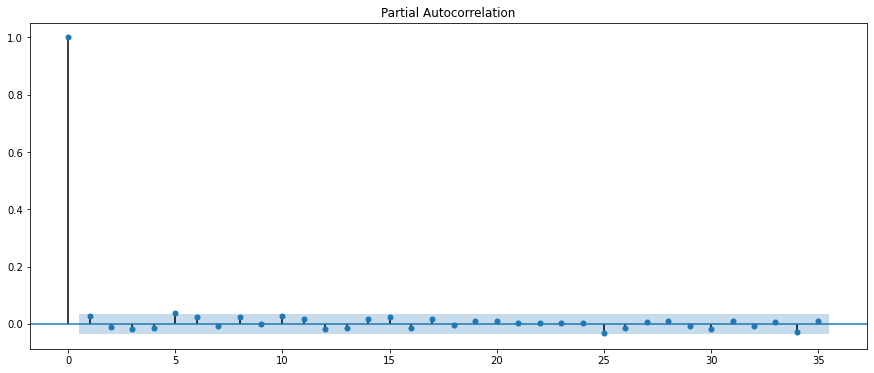

In [29]:
# ACF and PACF of the first difference
plt.rcParams["figure.figsize"] = (15, 6 )
plot_acf(diff1);
plot_pacf(diff1);

In [30]:
data['Close'].index = pd.DatetimeIndex(data['Close'].index).to_period('D')
size = int(len(data) * 0.8)
train_df, test_df = data[0:size], data[size:len(data)]

In [31]:
#Function for selecting the best model based on the Bayesian Information Criterion(BIC)
def select_mod(p_values, d_values, q_values, train):
    mod_eval = []
    mod_eval = pd.DataFrame(mod_eval)
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    mod_eval = mod_eval.append({'Order': order, 'BIC':model_fit.bic},
                                              ignore_index = True)
                except:
                    continue
    return mod_eval            
                

In [32]:
train_df_temp = train_df.copy()
train_df_temp

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.9600,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.5000,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.0500,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.5700,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.8800,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-18,603.01,606.70,590.9200,605.110,4871600.0,0.0,1.0,603.010000,606.700000,590.920000,605.110000,4871600.0
2014-07-21,601.35,604.16,594.4500,598.440,2237900.0,0.0,1.0,601.350000,604.160000,594.450000,598.440000,2237900.0
2014-07-22,599.70,608.89,599.2576,603.570,1881600.0,0.0,1.0,599.700000,608.890000,599.257600,603.570000,1881600.0


In [33]:
train_df_temp.index = pd.DatetimeIndex(train_df_temp.index).to_period('M')

In [34]:
# ARIMA Parameters
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
models = select_mod(p,d,q,train_df_temp['Close'])
models

,Order,BIC
0,"(0, 0, 0)",33833.358879
1,"(0, 0, 1)",30617.856383
2,"(0, 1, 0)",20642.620599
3,"(0, 1, 1)",20649.141865
4,"(1, 0, 0)",20669.670829
5,"(1, 0, 1)",20676.042168
6,"(1, 1, 0)",20649.173068
7,"(1, 1, 1)",20656.672343


In [35]:
# Choosing the best model
print(models[models.BIC == models.BIC.min()])

       Order           BIC
2  (0, 1, 0)  20642.620599


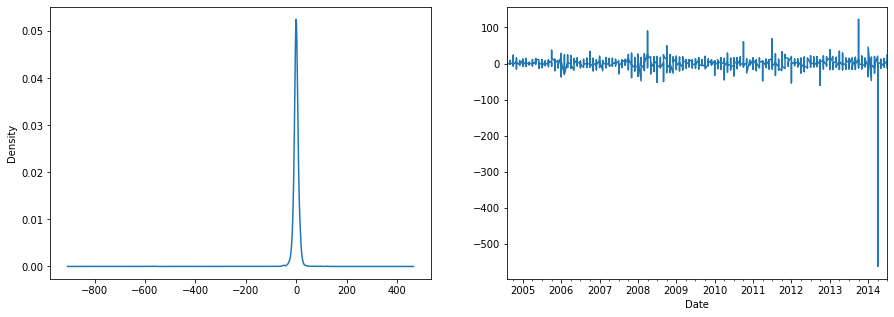

In [36]:
model = ARIMA(train_df_temp['Close'], order=(0,1,0))
model_fit = model.fit()
resid = model_fit.resid
#Evaluating the residuals
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
resid.plot.kde();
plt.subplot(1, 2, 2)
resid.plot()

In [37]:
k2, p = stats.normaltest(resid)
print("p = {:g}".format(p))

p = 0


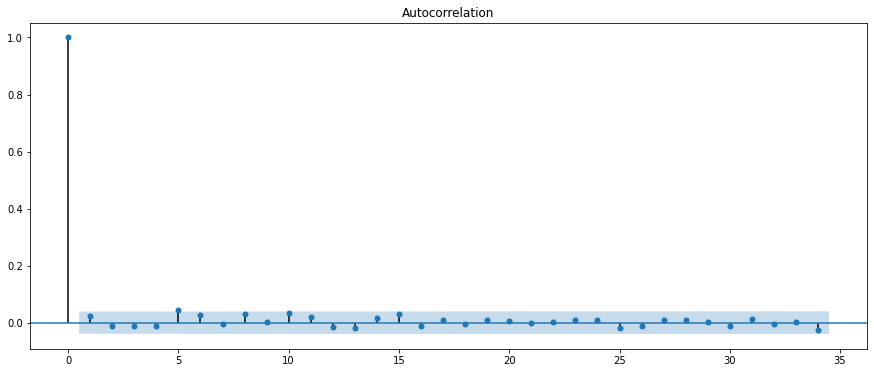

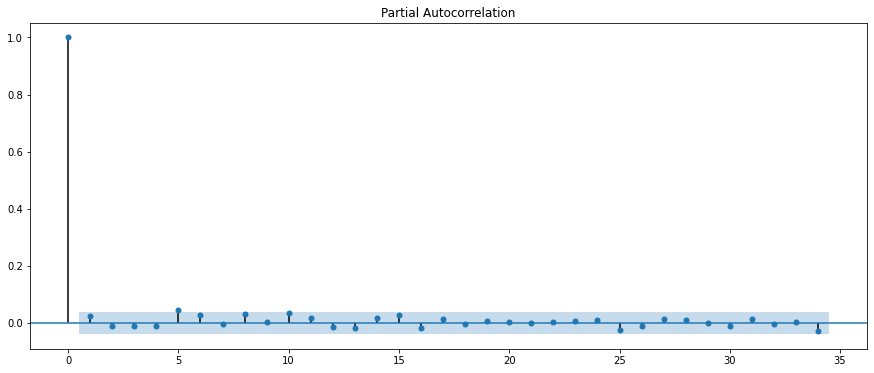

In [38]:
plt.rcParams["figure.figsize"] = (15, 6)
plot_acf(resid);
plot_pacf(resid);

In [39]:
history = [x for x in train_df['Close']]
predictions = list()
for t in range(len(test_df['Close'])):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test_df['Close'][t])

In [40]:
#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(test_df['Close'], predictions))
#Mean Absolute Percentage Error
mape = np.round(np.mean(np.abs(test_df['Close']-predictions)/test_df['Close'])*100,2)
print('Test Root Mean Squared Error(RMSE): %.3f' % rmse)
print('Test Mean Absolute Percentage Error(MAPE): %.3f' % mape)

Test Root Mean Squared Error(RMSE): 9.821
Test Mean Absolute Percentage Error(MAPE): 1.020


Text(0, 0.5, 'Closing Price of the Stock')

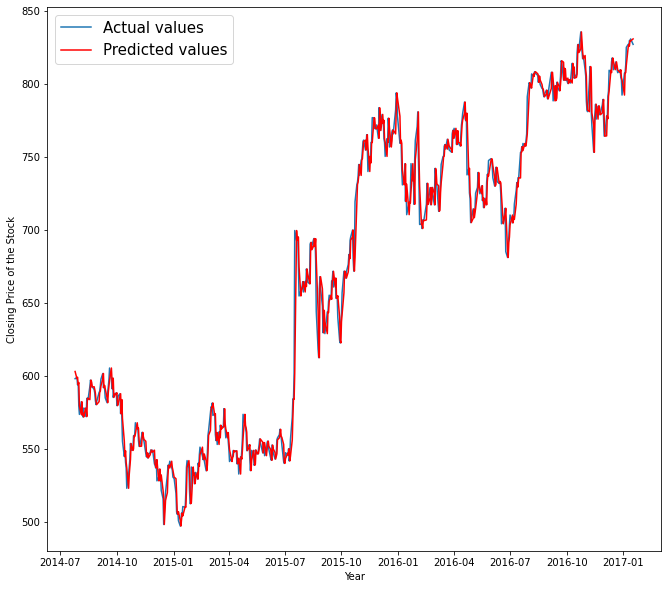

In [41]:
plt.figure(figsize=(11,10))
plt.plot(test_df['Close'].index, test_df['Close'], label = 'Actual values')
plt.plot(test_df['Close'].index, predictions, color='red', label = 'Predicted values')
plt.legend(fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Closing Price of the Stock")

   Here, the actual and predicted values coincide with each other.

Text(0, 0.5, 'Closing Price of the Stock')

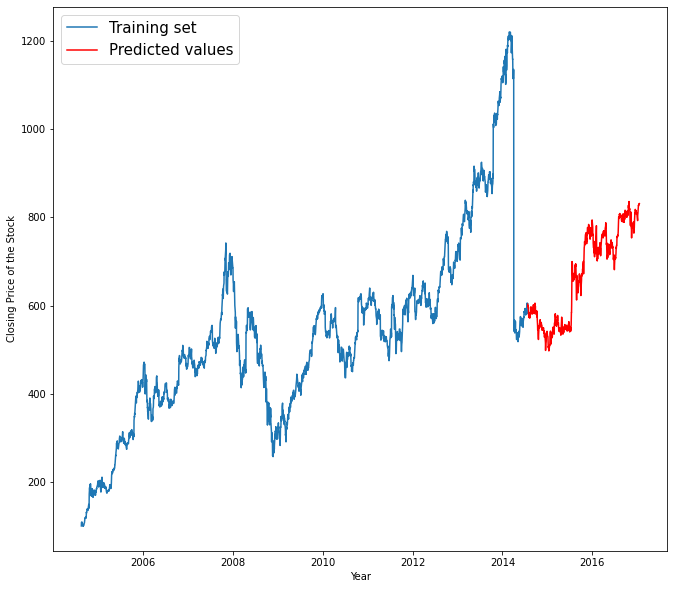

In [42]:
plt.figure(figsize=(11,10))
plt.plot(train_df['Close'].index, train_df['Close'], 
         label = 'Training set')
plt.plot(test_df['Close'].index, predictions, color='red', 
         label = 'Predicted values')
plt.legend(fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Closing Price of the Stock")

  In the predictions it reflects the general trend of the stocks data. Even though the closing value of the stocks keep on fluctuating, there is an increase in the closing price of the stocks with respect to time.



---

